### 3D Random Walk Model

Let us consider a particle moving in three-dimensional space in a discrete manner. Each step the particle takes is random but follows a specific probability density function.

1. **Binomial Distribution**  
   The Binomial distribution models the number of successes in a fixed number of independent Bernoulli trials, each with the same probability of success. It is defined by two parameters: $n$, the number of trials, and $p$, the probability of success in each trial. The probability mass function (PMF) is given by:

   \begin{equation*}
      P(X = k; \, n, \, p) = \binom{n}{k} \, p^k \, (1 - p)^{n - k} \quad k = 0, 1, 2, \dots, n
   \end{equation*}

   where $\binom{n}{k}$ is the binomial coefficient, calculated as $\frac{n!}{k!(n - k)!}$

2. **Poisson Distribution**  
   The Poisson distribution models the number of events occurring within a fixed interval of time or space, where the events occur independently and at a constant rate $\lambda$. The PMF is given by:

   \begin{equation*}
      P(X = k; \, \lambda) = \frac{\lambda^k e^{-\lambda}}{k!} \quad k = 0, 1, 2, \dots
   \end{equation*}

   where $\lambda > 0$ is the average rate of occurrence.

3. **Uniform Distribution**  
   The uniform distribution is a probability distribution where all outcomes are equally likely within a given range. For a continuous uniform distribution between $a$ and $b$, the probability density function (PDF) is:

   \begin{equation*}
      P(x; \, a, \, b) \, dx = \frac{1}{b - a} \, dx \quad a \leq x \leq b
   \end{equation*}

   and $P(x) = 0$ otherwise.

4. **Gaussian (Normal) Distribution**  
   The Gaussian distribution, also known as the normal distribution, is a continuous probability distribution characterized by its bell-shaped curve. It is defined by two parameters: the mean $\mu$ and the standard deviation $\sigma$. The PDF is:

   \begin{equation*}
      P(x; \, \mu , \, \sigma) \, dx = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} \, dx
   \end{equation*}

5. **Exponential Distribution**  
   The exponential distribution models the time between events in a Poisson process. It is defined by a single parameter $\lambda$, the rate parameter. The PDF is:

   \begin{equation*}
      P(x; \, \lambda) \, dx = \lambda e^{-\lambda x} \, dx \quad x \geq 0
   \end{equation*}

   where $\lambda > 0$.

6. **Chi-squared Distribution**  
   The chi-squared distribution is a special case of the gamma distribution and is used in statistical hypothesis testing, particularly in the context of goodness-of-fit tests. It is defined by a single parameter $k$, the number of degrees of freedom. The PDF is:

   \begin{equation*}
      P(x; \, k) \, dx = \frac{x^{\frac{k}{2} - 1} e^{-\frac{x}{2}}}{2^{\frac{k}{2}} \Gamma\left(\frac{k}{2}\right)} \, dx \quad x \geq 0
   \end{equation*}

   where $k > 0$ and $\Gamma$ is the Gamma function:

   \begin{equation*}
      \Gamma(z) = \int_0^\infty t^{z-1} e^{-t} \, dt, \quad \text{for} \, \, \text{Re}(z) > 0
   \end{equation*}


In [1]:
# Importing necessary functions and modules from numpy
from numpy import zeros, sum, array, mean, std, linspace, exp, pi
from numpy.random import normal, randint, poisson, uniform, exponential, chisquare
from numpy.linalg import norm

# Importing necessary functions from matplotlib for plotting
from matplotlib.pyplot import show, style, figure, tight_layout

# Importing numba for JIT compilation and parallel processing
from numba import jit, prange

# Setting the style for plots
style.use("bmh")

In [2]:
# Function generating Binomial distribution
@jit(nopython = True, parallel = True, cache = True, nogil = True, fastmath = True)
def binomial_distribution(N):

    # Total number of points generated
    M = 2 * N

    # Initializing arrays storing positions and distances
    position_x = zeros(M)
    position_y = zeros(M)
    position_z = zeros(M)
    distance_array = zeros(M)

    # Generating Binomial distributed points
    for i in prange(M):

        # Generating N points for each axis from a Binomial distribution
        binomial_x = 2 * randint(0, 2, size = N) - 1
        binomial_y = 2 * randint(0, 2, size = N) - 1
        binomial_z = 2 * randint(0, 2, size = N) - 1

        # Summing the points to get the position
        position_x[i] = sum(binomial_x)
        position_y[i] = sum(binomial_y)
        position_z[i] = sum(binomial_z)

        # Calculating the distance from the origin
        distance_array[i] = norm(array([position_x[i], position_y[i], position_z[i]]))

    return position_x, position_y, position_z, distance_array

# Function generating Poisson distribution
@jit(nopython = True, parallel = True, cache = True, nogil = True, fastmath = True)
def poisson_distribution(N, mean):

    # Total number of points generated
    M = 2 * N

    # Initializing arrays storing positions and distances
    position_x = zeros(M)
    position_y = zeros(M)
    position_z = zeros(M)
    distance_array = zeros(M)

    # Generating Poisson distributed points
    for i in prange(M):

        # Generating N points for each axis from a Poisson distribution
        poisson_x = (2 * randint(0, 2, size = N) - 1) * poisson(mean, size = N)
        poisson_y = (2 * randint(0, 2, size = N) - 1) * poisson(mean, size = N)
        poisson_z = (2 * randint(0, 2, size = N) - 1) * poisson(mean, size = N)

        # Summing the points to get the position
        position_x[i] = sum(poisson_x)
        position_y[i] = sum(poisson_y)
        position_z[i] = sum(poisson_z)

        # Calculating the distance from the origin
        distance_array[i] = norm(array([position_x[i], position_y[i], position_z[i]]))

    return position_x, position_y, position_z, distance_array

# Function generating Uniform distribution
@jit(nopython = True, parallel = True, cache = True, nogil = True, fastmath = True)
def uniform_distribution(N, l, h):

    # Total number of points generated
    M = 2 * N

    # Initializing arrays storing positions and distances
    position_x = zeros(M)
    position_y = zeros(M)
    position_z = zeros(M)
    distance_array = zeros(M)

    # Generating Uniform distributed points
    for i in range(M):

        # Generating N points for each axis from a Uniform distribution
        uniform_x = uniform(l, h, N)
        uniform_y = uniform(l, h, N)
        uniform_z = uniform(l, h, N)

        # Summing the points to get the position
        position_x[i] = sum(uniform_x)
        position_y[i] = sum(uniform_y)
        position_z[i] = sum(uniform_z)

        # Calculating the distance from the origin
        distance_array[i] = norm(array([position_x[i], position_y[i], position_z[i]]))

    return position_x, position_y, position_z, distance_array

# Function generating Gaussian distribution
@jit(nopython = True, parallel = True, cache = True, nogil = True, fastmath = True)
def gaussian_distribution(N, mean, std):

    # Total number of points generated
    M = 2 * N

    # Initializing arrays storing positions and distances
    position_x = zeros(M)
    position_y = zeros(M)
    position_z = zeros(M)
    distance_array = zeros(M)

    # Generating Gaussian distributed points
    for i in prange(M):

        # Generating N points for each axis from a Gaussian distribution
        gaussian_x = normal(mean, std, N)
        gaussian_y = normal(mean, std, N)
        gaussian_z = normal(mean, std, N)

        # Summing the points to get the position
        position_x[i] = sum(gaussian_x)
        position_y[i] = sum(gaussian_y)
        position_z[i] = sum(gaussian_z)

        # Calculating the distance from the origin
        distance_array[i] = norm(array([position_x[i], position_y[i], position_z[i]]))

    return position_x, position_y, position_z, distance_array

@jit(nopython = True, parallel = True, cache = True, nogil = True, fastmath = True)
def exponential_distribution(N, scale):
    
    # Total number of points generated
    M = 2 * N

    # Initializing arrays storing positions and distances
    position_x = zeros(M)
    position_y = zeros(M)
    position_z = zeros(M)
    distance_array = zeros(M)

    # Generating Exponential distributed points
    for i in prange(M):

        # Generating N points for each axis from an Exponential distribution
        exponential_x = (2 * randint(0, 2, size = N) - 1) * exponential(scale, N)
        exponential_y = (2 * randint(0, 2, size = N) - 1) * exponential(scale, N)
        exponential_z = (2 * randint(0, 2, size = N) - 1) * exponential(scale, N)

        # Summing the points to get the position
        position_x[i] = sum(exponential_x)
        position_y[i] = sum(exponential_y)
        position_z[i] = sum(exponential_z)

        # Calculating the distance from the origin
        distance_array[i] = norm(array([position_x[i], position_y[i], position_z[i]]))

    return position_x, position_y, position_z, distance_array

# Function generating Chi-Squared distribution
@jit(nopython = True, parallel = True, cache = True, nogil = True, fastmath = True)
def chi_squared_distribution(N, dof):

    # Total number of points generated
    M = 2 * N

    # Initializing arrays storing positions and distances
    position_x = zeros(M)
    position_y = zeros(M)
    position_z = zeros(M)
    distance_array = zeros(M)

    # Generating Chi-Squared distributed points
    for i in prange(M):
        
        # Generating N points for each axis from a Chi-Squared distribution
        chi_squared_x = (2 * randint(0, 2, size = N) - 1) * chisquare(df = dof, size = N)
        chi_squared_y = (2 * randint(0, 2, size = N) - 1) * chisquare(df = dof, size = N)
        chi_squared_z = (2 * randint(0, 2, size = N) - 1) * chisquare(df = dof, size = N)

        # Summing the points to get the position
        position_x[i] = sum(chi_squared_x)
        position_y[i] = sum(chi_squared_y)
        position_z[i] = sum(chi_squared_z)

        # Calculating the distance from the origin
        distance_array[i] = norm(array([position_x[i], position_y[i], position_z[i]]))

    return position_x, position_y, position_z, distance_array

# Function plotting the distributions
def plotter(function, steps, *args, **kwargs):
    
    # Getting the positions and distances from the distribution function
    position_x, position_y, position_z, distance_array = function(steps, *args, **kwargs)

    # Calculating the mean of the positions
    mean_x = mean(position_x)
    mean_y = mean(position_y)
    mean_z = mean(position_z)

    # Calculating the standard deviation of the positions
    std_x = std(position_x)
    std_y = std(position_y)
    std_z = std(position_z)

    # Calculating the mean and standard deviation of the distances
    mean_distance = mean(distance_array)
    std_distance = std(distance_array)

    # Creating arrays for plotting the Gaussian fits
    z = linspace(min(position_z), max(position_z), 3000)
    r = linspace(min(distance_array), max(distance_array), 3000)

    # Creating a figure with 3 subplots
    fig = figure(figsize = (16, 6))

    # Plotting the 3D scatter plot of positions
    ax1 = fig.add_subplot(131, projection = '3d', facecolor = 'white')
    ax1.view_init(elev = 20, azim = 10)
    ax1.scatter(position_x, position_y, position_z, alpha = 0.5, color = 'red', s = 0.25)
    ax1.set_xlabel('X Axis', fontweight = 'bold')
    ax1.set_ylabel('Y Axis', fontweight = 'bold')
    ax1.set_zlabel('Z Axis', fontweight = 'bold')
    ax1.set_title('Position in space', fontweight = 'bold')

    # Plotting the histogram of positions
    ax2 = fig.add_subplot(132)
    counts = ax2.hist(position_z, bins = 'auto', density = True, alpha = 0.5, color = 'blue', label = 'Probability density')
    ax2.annotate('', xytext = (mean_z - std_z, max(counts[0] / 2)), xy = (mean_z + std_z, max(counts[0] / 2)), arrowprops = dict(arrowstyle = '<->', color = 'blue', linewidth = 1))
    ax2.annotate('', xytext = (mean_z, 0), xy = (mean_z, max(counts[0])), arrowprops = dict(arrowstyle = '-', color = 'blue', linewidth = 1))
    ax2.set_title('Distribution of position', fontweight = 'bold')
    ax2.set_xlabel('X,Y or Z position', fontweight = 'bold')
    ax2.set_ylabel('Probability', fontweight = 'bold')
    ax2.plot(z, 1 / (std_z * (2 * pi) ** 0.5) * exp(-0.5 * ((z - mean_z) / std_z) ** 2), color = 'black', linewidth = 1.5, label = 'Gaussian fit')
    ax2.legend()

    # Plotting the histogram of distances
    ax3 = fig.add_subplot(133)
    counts = ax3.hist(distance_array, bins = 'auto', density = True, color = 'gray', label = 'Probability density')
    ax3.annotate('', xytext = (mean_distance - std_distance, max(counts[0] / 2)), xy = (mean_distance + std_distance, max(counts[0] / 2)), arrowprops = dict(arrowstyle = '<->', color = 'black', linewidth = 1))
    ax3.annotate('', xytext = (mean_distance, 0), xy = (mean_distance, max(counts[0])), arrowprops = dict(arrowstyle = '-', color = 'black', linewidth = 1, linestyle = 'dashed'))
    ax3.set_title('Distribution of distance', fontweight = 'bold')
    ax3.set_xlabel('Distance', fontweight = 'bold')
    ax3.set_ylabel('Probability', fontweight = 'bold')
    ax3.plot(r, (4 * pi * r ** 2) / ((std_z * (2 * pi) ** 0.5)) ** 3 * exp(-0.5 * ((r - mean_z) / std_z) ** 2), color = 'black', linewidth = 1.5, label = 'Distance fit')
    ax3.legend()
    
    tight_layout()
    show()

    # Printing the mean and standard deviation of positions and distances
    print(f'Mean position X: {mean_x} +- {std_x}')
    print(f'Mean position Y: {mean_y} +- {std_y}')
    print(f'Mean position Z: {mean_z} +- {std_z}')
    print(f'Mean distance: {mean_distance} +- {std_distance}')

    return None

In [3]:
# Setting the number of steps
N = 50_000

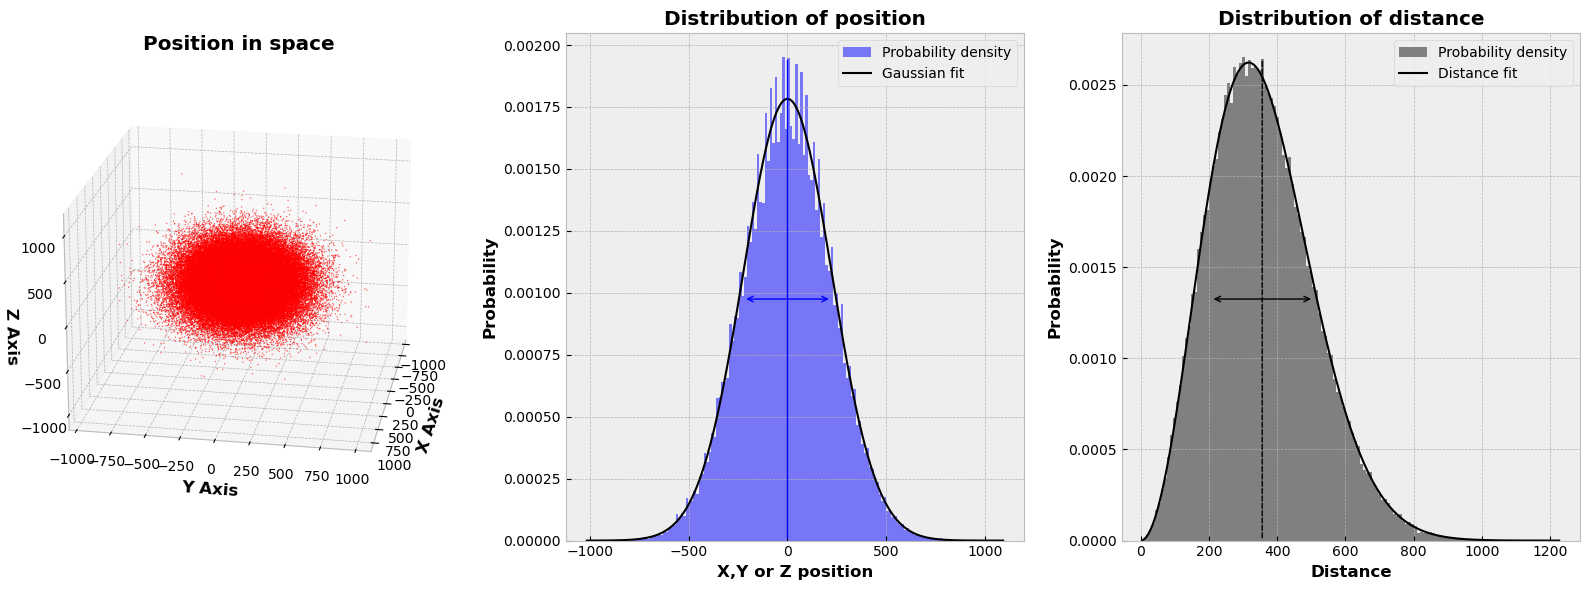

Mean position X: 0.63996 +- 223.14711732666055
Mean position Y: -0.23548 +- 223.31593151669585
Mean position Z: -0.04104 +- 223.78338310901998
Mean distance: 356.3377732968147 +- 150.8890380440801


In [4]:
plotter(function = binomial_distribution, steps = N)

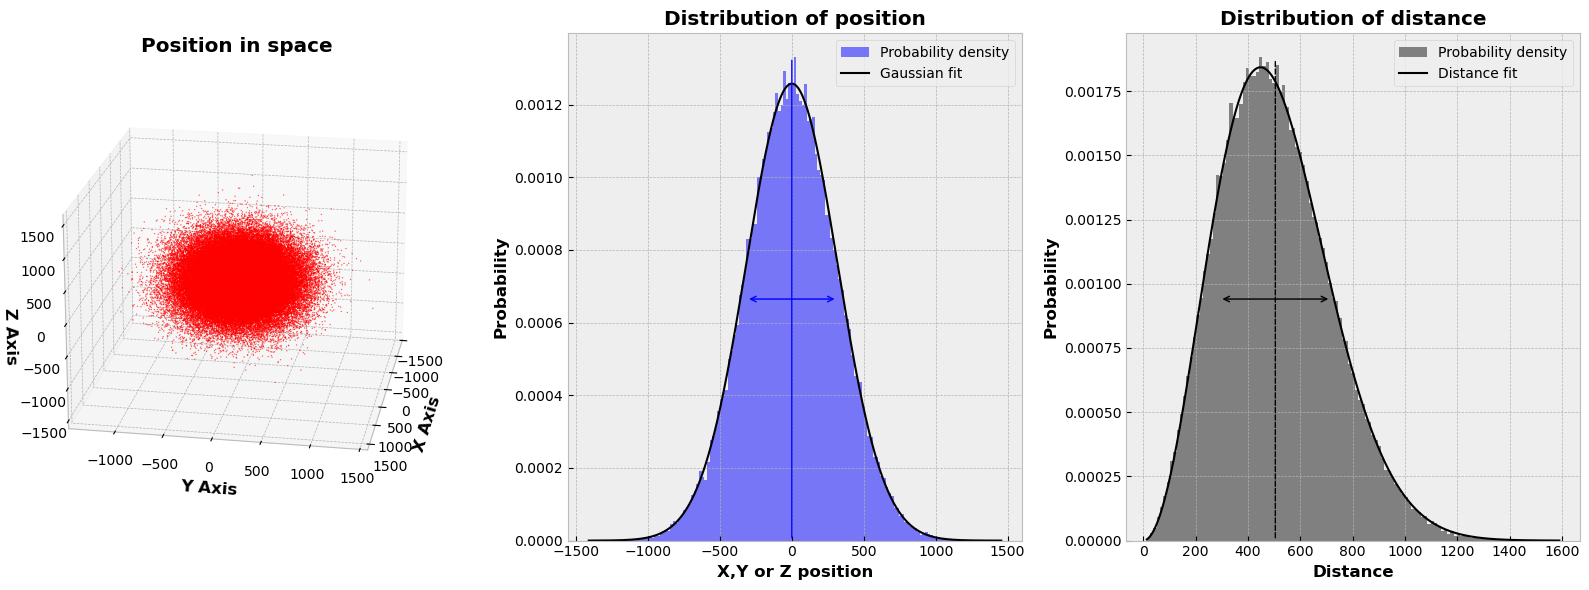

Mean position X: 2.20696 +- 316.0991994415019
Mean position Y: 0.11325 +- 315.4783822141186
Mean position Z: -1.00034 +- 317.13945002141315
Mean distance: 504.5935108284557 +- 213.1056482118978


In [5]:
plotter(function = poisson_distribution, steps = N, mean = 1)

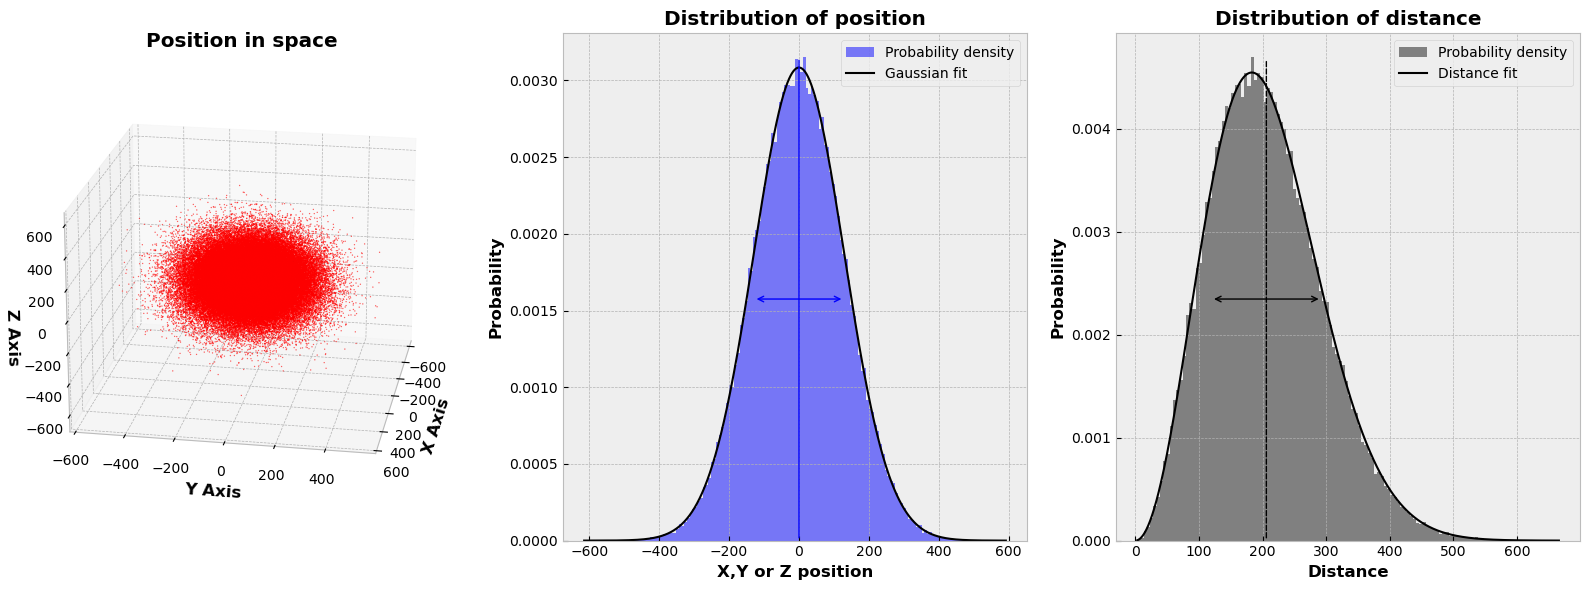

Mean position X: -0.17707508773795144 +- 128.59887771936258
Mean position Y: -0.40765260378118867 +- 128.98706907067736
Mean position Z: 0.142024388230072 +- 129.34889664644672
Mean distance: 205.86109612444722 +- 86.76346703178957


In [6]:
plotter(function = uniform_distribution, steps = N, l = - 1, h = 1)

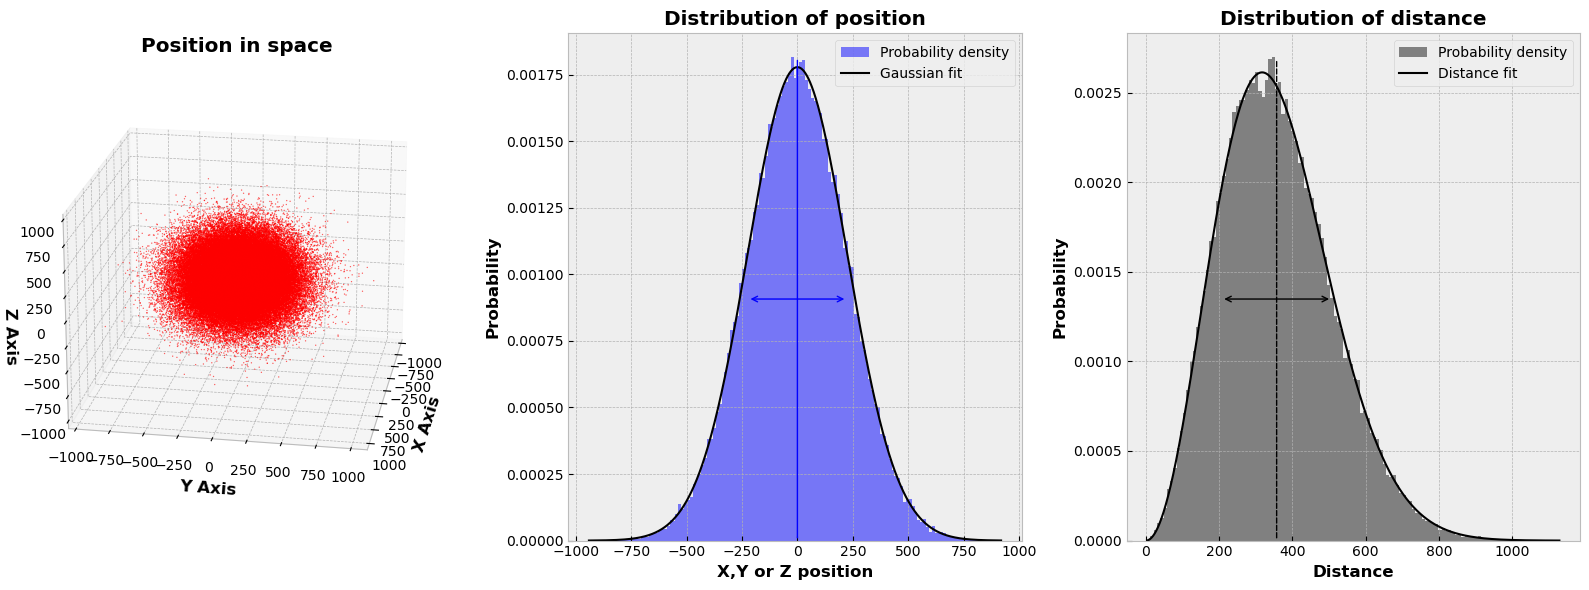

Mean position X: 0.8213699997962768 +- 222.93624862682873
Mean position Y: -1.8191370015822477 +- 223.69703422048875
Mean position Z: -0.2683425164765831 +- 224.296872967395
Mean distance: 356.7578776906785 +- 150.92347039229375


In [7]:
plotter(function = gaussian_distribution, steps = N, mean = 0, std = 1)

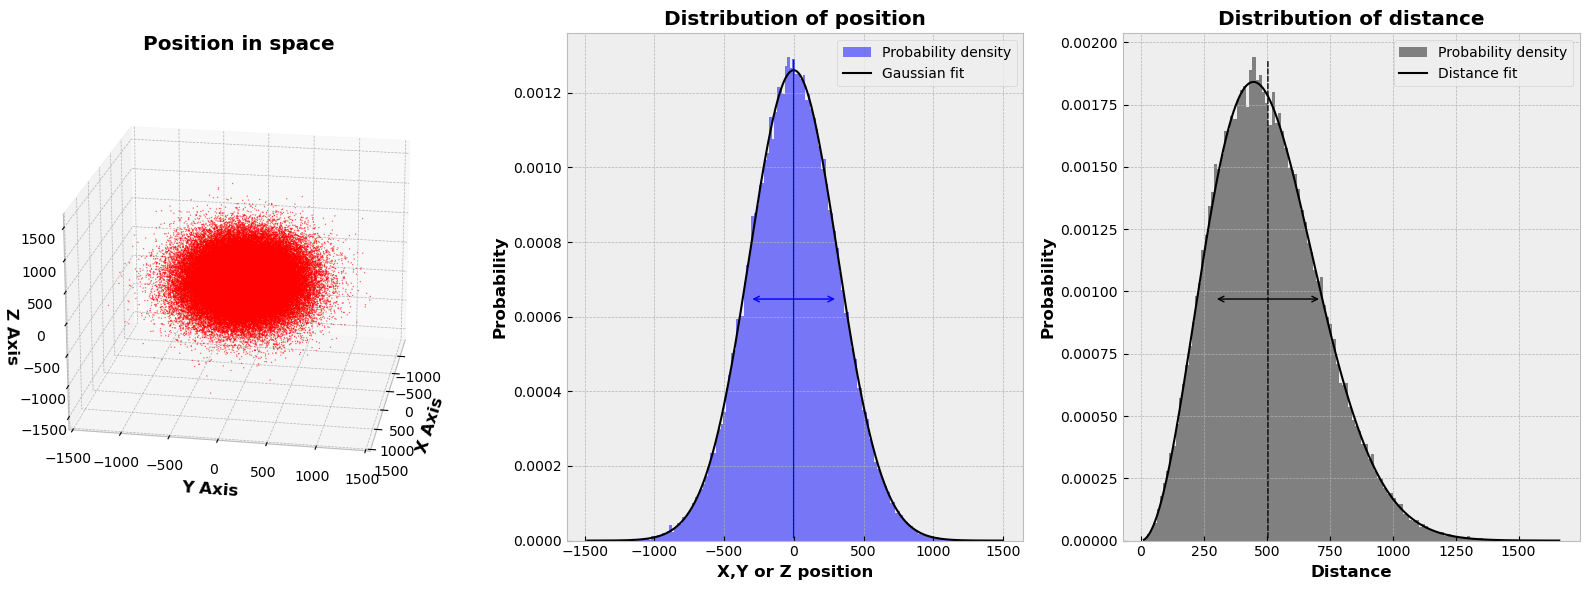

Mean position X: -0.05175107313479908 +- 315.6858831257205
Mean position Y: -1.6069929922068285 +- 316.2478962586605
Mean position Z: -1.6763916251981446 +- 316.4559187460285
Mean distance: 504.04364762552353 +- 213.9159972610189


In [8]:
plotter(function = exponential_distribution, steps = N, scale = 1)

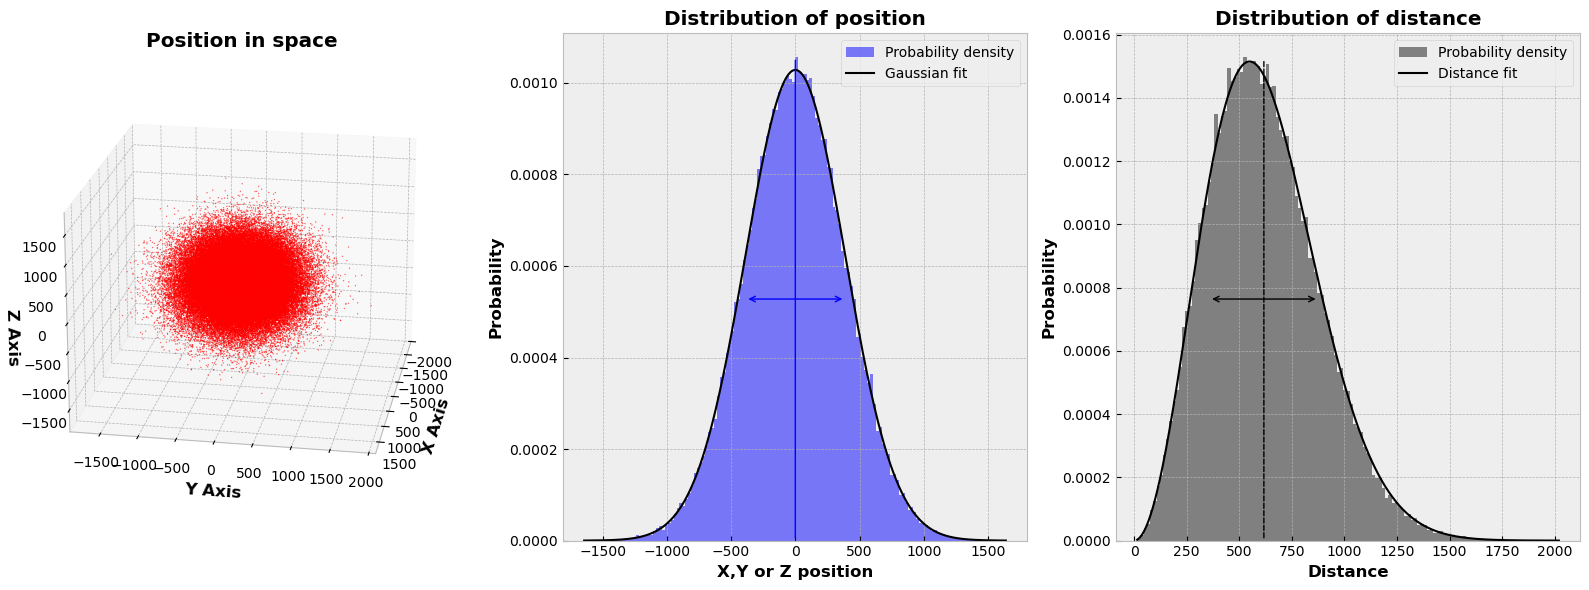

Mean position X: -1.9495972740899878 +- 386.3501633492649
Mean position Y: 0.6817608075590963 +- 384.8495292887095
Mean position Z: 0.2656449907062164 +- 387.93482061686734
Mean distance: 616.7619514095255 +- 259.7654048346142


In [9]:
plotter(function = chi_squared_distribution, steps = N, dof = 1)

The form of the probability function describing the particle’s position along an axis and its distance is independent of the choice of the step’s distribution. This is a consequence of the Central Limit Theorem: the sum of a large number of random variables, independent of each other and identically distributed, is itself a random variable that follows a Gaussian distribution, with the mean and standard deviation determined by the original distribution:

\begin{equation*}
    X = \sum _ {k = 1} ^ N X_k \quad P(X) \, dX \approx \frac{1}{\sqrt{2 \pi N} \sigma } e ^ {- \frac{1}{2} \left( \frac{X - N \mu}{\sqrt{N} \sigma}  \right) ^ 2} \, dX
\end{equation*}

Where $\mu$ and $\sigma$ are respectively the mean and the standard deviation of the original distribution.

Similarly, the same distributions found for the particle’s position also apply to its velocity components. Moreover, if you now think of the particle as a particle belonging to a monatomic ideal gas, and that at each step the particle can gain or lose a random amount of kinetic energy, it follows immediately that the particle’s energy distribution is consistent with the Maxwell-Boltzmann distribution:

\begin{equation*}
P(v) \, dv \propto v ^ 2 \, e^ {- \frac{1}{2} (\frac{v - \alpha_v}{\beta_v}) ^ 2} \, dv
\end{equation*}

Let $E \propto v ^ 2$ to get:

\begin{equation*}
P(E) \, dE \propto \sqrt{E} \, e^ {- \frac{1}{2} (\frac{E - \alpha_E}{\beta_E}) ^ 2} \, dE
\end{equation*}

Where $\alpha_v$, $\beta_v$, $\alpha_E$ and $\beta_E$ are physical quantities individuated by classical statistical mechanics